<a href="https://colab.research.google.com/github/GeronimoQB/GeronimoQB/blob/main/Imputation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imputation Data**
La imputación es el proceso de reemplazar valores faltantes en un conjunto de datos con valores estimados o sustituidos. Los datos faltantes son un problema común en los análisis de datos, y manejarlos correctamente es crucial para obtener resultados precisos.

## **1. Mean/Median/Mode Imputation**

* Imputación con Media: Reemplaza los valores faltantes con la media de la columna (adecuado para datos numéricos).
* Imputación con Mediana: Reemplaza los valores faltantes con la mediana de la columna (robusto ante valores atípicos).
* Imputación con Moda: Reemplaza los valores faltantes con la moda de la columna (adecuado para datos categóricos).

In [ ]:
import pandas as pd
import numpy as np

# DataFrame de ejemplo con valores faltantes
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': ['X', 'Y', np.nan, 'Y', 'Z']
})

print(df)

     A    B
0  1.0    X
1  2.0    Y
2  NaN  NaN
3  4.0    Y
4  5.0    Z


In [ ]:
# Imputación con media para columna numérica
df['A'].fillna(df['A'].mean(), inplace=True)

# Imputación con moda para columna categórica
df['B'].fillna(df['B'].mode()[0], inplace=True)

print(df)

     A  B
0  1.0  X
1  2.0  Y
2  3.0  Y
3  4.0  Y
4  5.0  Z


## **2. Forward Fill (ffill) and Backward Fill (bfill)**

* Relleno hacia Adelante: Propaga el último valor válido hacia adelante para llenar los valores faltantes.
* Relleno hacia Atrás: Usa el siguiente valor válido para llenar los valores faltantes.


In [ ]:
# DataFrame de ejemplo con valores faltantes
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': ['X', 'Y', np.nan, 'Y', 'Z']
})

print(df)

     A    B
0  1.0    X
1  2.0    Y
2  NaN  NaN
3  4.0    Y
4  5.0    Z


In [ ]:
# Forward fill
df['A'].fillna(method='ffill', inplace=True)

# Backward fill
df['B'].fillna(method='bfill', inplace=True)
print(df)

     A  B
0  1.0  X
1  2.0  Y
2  2.0  Y
3  4.0  Y
4  5.0  Z


## **3. Interpolation**

La interpolación estima los valores faltantes basándose en otros valores del conjunto de datos. Los métodos comunes incluyen interpolación lineal, polinómica o basada en tiempo.


In [ ]:
# DataFrame de ejemplo con valores faltantes
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': ['X', 'Y', np.nan, 'Y', 'Z']
})

print(df)

     A    B
0  1.0    X
1  2.0    Y
2  NaN  NaN
3  4.0    Y
4  5.0    Z


In [ ]:
# Linear interpolation
df['A'].interpolate(method='linear', inplace=True)

# Backward fill
df['B'].fillna(method='bfill', inplace=True)

print(df)

     A  B
0  1.0  X
1  2.0  Y
2  3.0  Y
3  4.0  Y
4  5.0  Z


## **4. K-Nearest Neighbors (KNN) Imputation**

La imputación KNN reemplaza los valores faltantes con el promedio de los valores de los vecinos más cercanos. Es adecuado para datos numéricos.

In [ ]:
from sklearn.impute import KNNImputer

# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, 7, 8, 9]
})

print(df)

     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0
4  5.0  9.0


In [ ]:
# KNN Imputation
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)

     A    B
0  1.0  5.0
1  2.0  6.5
2  2.5  7.0
3  4.0  8.0
4  5.0  9.0


## **5. Multivariate Imputation by Chained Equations (MICE)**

MICE es una técnica avanzada que modela cada característica con valores faltantes como una función de otras características y utiliza esa estimación para la imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, 7, 8, 9]
})

print(df)

     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0
4  5.0  9.0


In [ ]:
# MICE Imputation
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)

          A         B
0  1.000000  5.000000
1  2.000000  6.000036
2  2.999873  7.000000
3  4.000000  8.000000
4  5.000000  9.000000


## **6. Using Predictive Models**

Los modelos de aprendizaje automático (por ejemplo, regresión, árboles de decisión) pueden entrenarse para predecir los valores faltantes basándose en otras características del conjunto de datos.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, 6, 7, 8, 9]
})

print(df)

     A  B
0  1.0  5
1  2.0  6
2  NaN  7
3  4.0  8
4  5.0  9


In [ ]:
# Train a model to predict missing values in column 'A'
train_data = df.dropna()
test_data = df[df['A'].isna()]

X_train = train_data[['B']]
y_train = train_data['A']

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict missing values
test_data['A'] = model.predict(test_data[['B']])
df_imputed = pd.concat([train_data, test_data])

print(df_imputed)

      A  B
0  1.00  5
1  2.00  6
3  4.00  8
4  5.00  9
2  2.43  7


<ipython-input-35-822b7bfde3ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['A'] = model.predict(test_data[['B']])


## **7. Dropping Missing Values**

Si el conjunto de datos es grande y los valores faltantes son pocos, puedes eliminar filas o columnas con valores faltantes.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5, 8, 9, 10, 25, np.nan],
    'B': [5, np.nan, 7, 8, 9, 8, 10, 12, np.nan, 20]
})

print(df)

      A     B
0   1.0   5.0
1   2.0   NaN
2   NaN   7.0
3   4.0   8.0
4   5.0   9.0
5   8.0   8.0
6   9.0  10.0
7  10.0  12.0
8  25.0   NaN
9   NaN  20.0


In [ ]:
# Drop rows with any missing values
df.dropna(axis=0, inplace=True)

# Drop columns with any missing values
df.dropna(axis=1, inplace=True)

print(df)

      A     B
0   1.0   5.0
3   4.0   8.0
4   5.0   9.0
5   8.0   8.0
6   9.0  10.0
7  10.0  12.0


**8. Custom Imputation**

Puedes definir reglas personalizadas para la imputación basadas en conocimiento del dominio o requisitos específicos.

In [ ]:
# DataFrame de ejemplo con valores faltantes
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': ['X', 'Y', np.nan, 'Y', 'Z']
})

print(df)

     A    B
0  1.0    X
1  2.0    Y
2  NaN  NaN
3  4.0    Y
4  5.0    Z


In [ ]:
# Replace missing values with a specific value
df['A'].fillna(0, inplace=True)

df['B'].fillna(300, inplace=True)


print(df)

     A    B
0  1.0    X
1  2.0    Y
2  0.0  300
3  4.0    Y
4  5.0    Z


<ipython-input-71-70c918187fcf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A'].fillna(0, inplace=True)
<ipython-input-71-70c918187fcf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col

## **Resumen de Técnicas de Imputación bold text**

¿Cómo Elegir la Técnica Correcta?

* Datos Numéricos: Media, mediana, KNN, MICE o modelos predictivos.
* Datos Categóricos: Moda o imputación personalizada.
* Datos de Series Temporales: Relleno hacia adelante/atrás o interpolación.
* Datos con Muchos Valores Faltantes: Considera eliminar filas/columnas o usar técnicas avanzadas como MICE.

# **Bonus**

In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame grande con 100,000 filas y 5 columnas
np.random.seed(42)
data = {
    'A': np.random.rand(100000) * 100,  # Columna numérica
    'B': np.random.randint(0, 100, 100000),  # Columna numérica
    'C': np.random.choice(['X', 'Y', 'Z'], 100000),  # Columna categórica
    'D': np.random.rand(100000) * 50,  # Columna numérica
    'E': np.random.choice(['High', 'Medium', 'Low'], 100000)  # Columna categórica
}

df = pd.DataFrame(data)

# Introducir valores faltantes aleatorios (10% de los datos)
for col in df.columns:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

df

,A,B,C,D,E
0,37.454012,97.0,Y,34.240082,High
1,95.071431,NaN,X,18.835281,Low
2,73.199394,61.0,Z,19.502415,Medium
3,59.865848,78.0,X,NaN,Medium
4,15.601864,56.0,Z,40.064303,Low
...,...,...,...,...,...
99995,79.230483,78.0,Y,17.175163,High
99996,NaN,87.0,Y,49.740474,Medium
99997,67.445341,31.0,Z,48.658054,Medium
99998,49.944724,1.0,X,44.155290,High


In [ ]:
print("DataFrame con valores faltantes:")
print(df.head())


DataFrame con valores faltantes:
           A     B  C          D       E
0  37.454012  97.0  Y  34.240082    High
1  95.071431   NaN  X  18.835281     Low
2  73.199394  61.0  Z  19.502415  Medium
3  59.865848  78.0  X        NaN  Medium
4  15.601864  56.0  Z  40.064303     Low


In [ ]:
print("\nCantidad de valores faltantes por columna:")
print(df.isnull().sum())


Cantidad de valores faltantes por columna:
A    10000
B    10000
C    10000
D    10000
E    10000
dtype: int64


In [ ]:
import warnings

# Desactivar todas las advertencias
warnings.filterwarnings('ignore')

# Imputación con Media para columnas numéricas
df['A'].fillna(df['A'].mean(), inplace=True)  # Imputar con la media de la columna A
df['B'].fillna(df['B'].mean(), inplace=True)  # Imputar con la media de la columna B
df['D'].fillna(df['D'].mean(), inplace=True)  # Imputar con la media de la columna D

# Imputación con Mediana para columnas numéricas (opcional)
# df['A'].fillna(df['A'].median(), inplace=True)  # Imputar con la mediana de la columna A

# Imputación con Moda para columnas categóricas
df['C'].fillna(df['C'].mode()[0], inplace=True)  # Imputar con la moda de la columna C
df['E'].fillna(df['E'].mode()[0], inplace=True)  # Imputar con la moda de la columna E

print("\nDataFrame después de la imputación:")
print(df.head())



DataFrame después de la imputación:
           A          B  C          D       E
0  37.454012  97.000000  Y  34.240082    High
1  95.071431  49.415956  X  18.835281     Low
2  73.199394  61.000000  Z  19.502415  Medium
3  59.865848  78.000000  X  24.969541  Medium
4  15.601864  56.000000  Z  40.064303     Low


In [ ]:
print("\nCantidad de valores faltantes por columna después de la imputación:")
print(df.isnull().sum())


Cantidad de valores faltantes por columna después de la imputación:
A    0
B    0
C    0
D    0
E    0
dtype: int64


DataFrame con valores faltantes:
           A     B  C
0  37.454012   NaN  Y
1  95.071431  71.0  X
2  73.199394   NaN  Z
3  59.865848  78.0  X
4  15.601864  56.0  Z

Cantidad de valores faltantes por columna:
A    10000
B    10000
C    10000
dtype: int64

Distribuciones antes de la imputación:


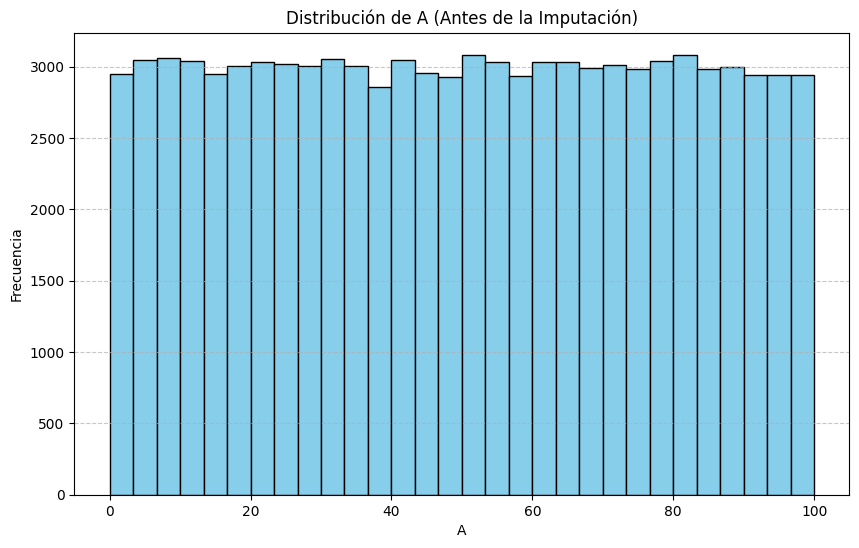

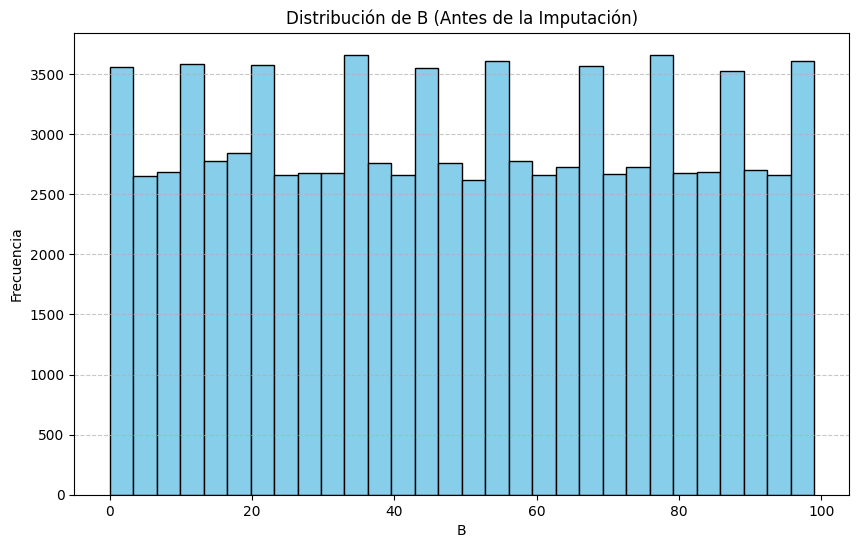

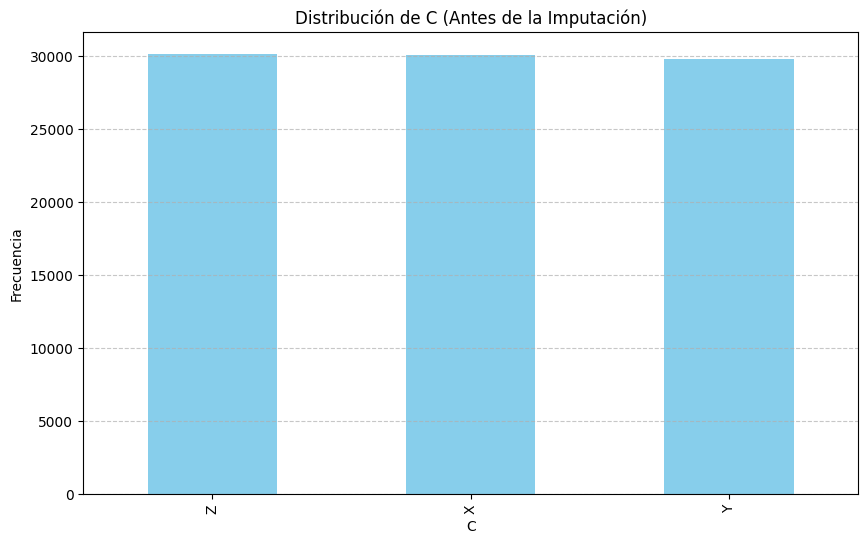


Distribuciones después de la imputación:


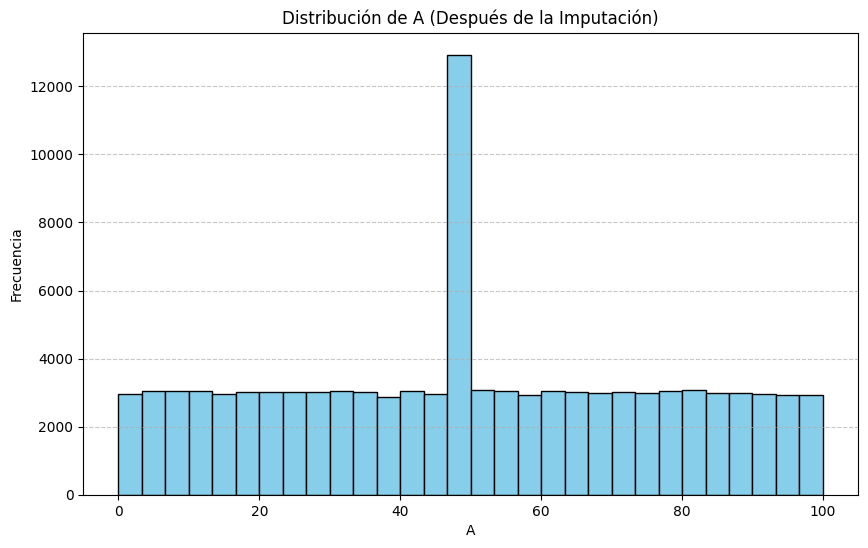

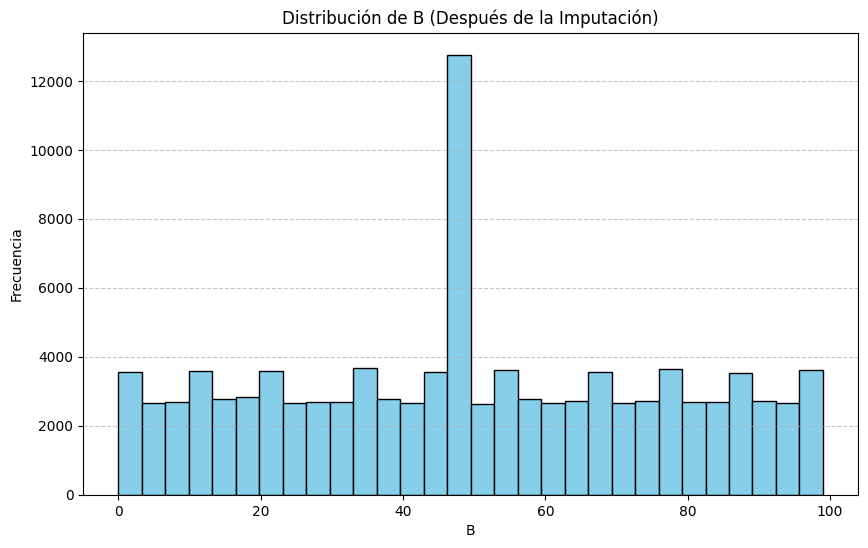

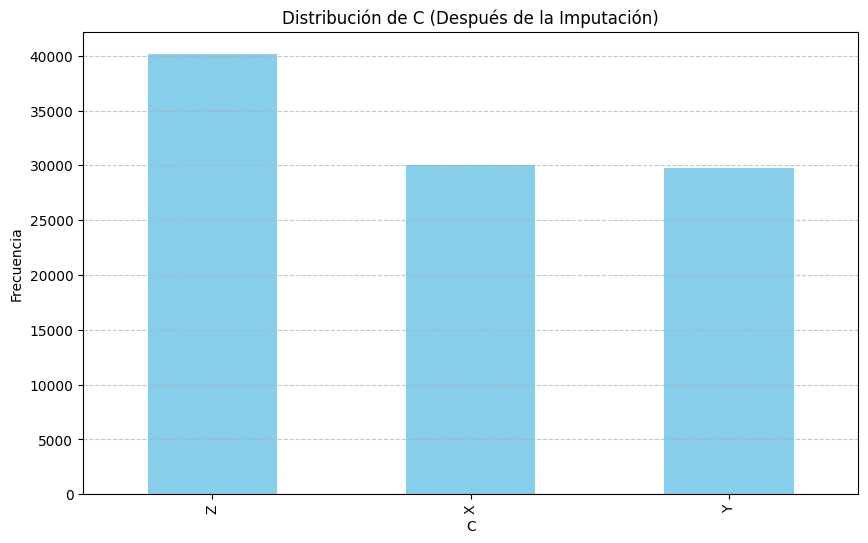

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame grande con 100,000 filas y 3 columnas
np.random.seed(42)
data = {
    'A': np.random.rand(100000) * 100,  # Columna numérica
    'B': np.random.randint(0, 100, 100000),  # Columna numérica
    'C': np.random.choice(['X', 'Y', 'Z'], 100000)  # Columna categórica
}

df = pd.DataFrame(data)

# Introducir valores faltantes aleatorios (10% de los datos)
for col in df.columns:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

print("DataFrame con valores faltantes:")
print(df.head())
print("\nCantidad de valores faltantes por columna:")
print(df.isnull().sum())

# Función para graficar distribuciones
def plot_distribution(df, col, title):
    plt.figure(figsize=(10, 6))
    if df[col].dtype == 'object':  # Para columnas categóricas
        df[col].value_counts().plot(kind='bar', color='skyblue')
    else:  # Para columnas numéricas
        df[col].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Graficar distribuciones antes de la imputación
print("\nDistribuciones antes de la imputación:")
plot_distribution(df, 'A', 'Distribución de A (Antes de la Imputación)')
plot_distribution(df, 'B', 'Distribución de B (Antes de la Imputación)')
plot_distribution(df, 'C', 'Distribución de C (Antes de la Imputación)')

# Imputación con Media, Mediana y Moda
df['A'].fillna(df['A'].mean(), inplace=True)  # Imputar con la media de la columna A
df['B'].fillna(df['B'].median(), inplace=True)  # Imputar con la mediana de la columna B
df['C'].fillna(df['C'].mode()[0], inplace=True)  # Imputar con la moda de la columna C

# Graficar distribuciones después de la imputación
print("\nDistribuciones después de la imputación:")
plot_distribution(df, 'A', 'Distribución de A (Después de la Imputación)')
plot_distribution(df, 'B', 'Distribución de B (Después de la Imputación)')
plot_distribution(df, 'C', 'Distribución de C (Después de la Imputación)')